In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
train_loc = 'data/train.csv'
test_loc = 'data/test.csv'

train = pd.read_csv(train_loc, sep='\t')
test = pd.read_csv(test_loc, sep='\t')

In [7]:
train.describe()
test.describe()

,Row,Problem View,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects
count,1.140000e+03,1140.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,666.000000,0.0,0.0,0.0
mean,5.941387e+05,1.544737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.810811,NaN,NaN,NaN
std,3.211333e+05,1.425566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391953,NaN,NaN,NaN
min,1.003900e+04,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,3.164400e+05,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,5.853410e+05,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,8.847702e+05,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
max,1.078861e+06,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


In [4]:
important_cols = ['Anon Student Id',\
    'Problem Name','Problem View', 'Step Name', 'Step Start Time',\
        'First Transaction Time', 'Correct Transaction Time','Step End Time',\
            'Step Duration (sec)', 'Correct Step Duration (sec)',\
                'Error Step Duration (sec)','Correct First Attempt', 'Incorrects',\
                     'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)']
datatype = {}
for col in train.columns:
    datatype[col] = train[col].dtype

num_of_students = len(np.unique(train['Anon Student Id']))
num_of_steps = len(np.unique(train[['Problem Name','Step Name']]))

count    181599.000000
mean         17.924024
std          35.179534
min           0.000000
25%           5.000000
50%           8.000000
75%          17.000000
max        1067.000000
Name: Correct Step Duration (sec), dtype: float64


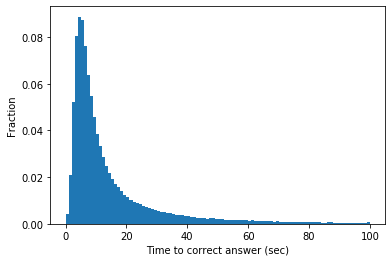

In [8]:
csd1 = train['Correct Step Duration (sec)']
print(csd1.describe())
hist = plt.hist(np.array(csd1.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

count    50853.000000
mean        60.547204
std         89.287960
min          0.000000
25%         16.000000
50%         32.000000
75%         67.000000
max       1888.000000
Name: Error Step Duration (sec), dtype: float64


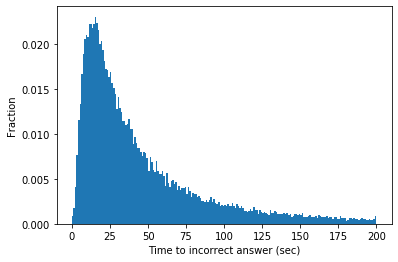

In [9]:
csd2 = train['Error Step Duration (sec)']
print(csd2.describe())
hist = plt.hist(np.array(csd2.dropna()),bins=200,density=True,log=False,range=(0,200))
plt.xlabel('Time to incorrect answer (sec)')
plt.ylabel('Fraction')
plt.show()

count    232744.000000
mean          0.780935
std           0.413613
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Correct First Attempt, dtype: float64


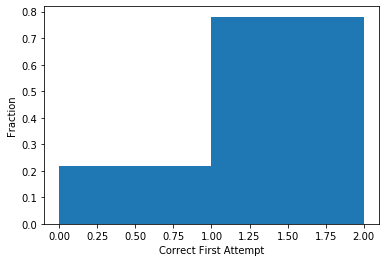

In [14]:
csd3 = train['Correct First Attempt']
print(csd3.describe())
hist = plt.hist(np.array(csd3.dropna()),bins=2,density=True,log=False,range=(0,2))
plt.xlabel('Correct First Attempt')
plt.ylabel('Fraction')
plt.show()

count    232744.000000
mean          1.602838
std           1.515546
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          21.000000
Name: Problem View, dtype: float64


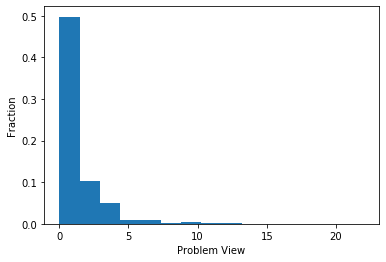

In [18]:
csd4 = train['Problem View']
print(csd4.describe())
hist = plt.hist(np.array(csd4.dropna()),bins=15,density=True,log=False,range=(0,22))
plt.xlabel('Problem View')
plt.ylabel('Fraction')
plt.show()

In [20]:
check_nan_train = train.isna().sum()
check_nan_test = test.isna().sum()
print(check_nan_train,check_nan_test)

Row                                 0
Anon Student Id                     0
Problem Hierarchy                   0
Problem Name                        0
Problem View                        0
Step Name                           0
Step Start Time                   292
First Transaction Time              0
Correct Transaction Time         7034
Step End Time                       0
Step Duration (sec)               292
Correct Step Duration (sec)     51145
Error Step Duration (sec)      181891
Correct First Attempt               0
Incorrects                          0
Hints                               0
Corrects                            0
KC(Default)                     59255
Opportunity(Default)            59255
dtype: int64 Row                               0
Anon Student Id                   0
Problem Hierarchy                 0
Problem Name                      0
Problem View                      0
Step Name                         0
Step Start Time                1140
First Transac

In [23]:
check_unique_train_spe = train.duplicated(subset=['Anon Student Id','Problem Name','Step Name','Problem View','Step Duration (sec)']).any()
check_unique_test_spe = test.duplicated(subset=['Anon Student Id','Problem Name','Step Name','Problem View','Step Duration (sec)']).any()
print(check_unique_train_spe, check_unique_test_spe)

False False


In [25]:
check_unique_train = len(train.drop_duplicates()) == len(train)
check_unique_test = len(test.drop_duplicates()) == len(test)
print(check_unique_train,check_unique_test)

True True


In [26]:
cols = train.columns
'''cols = ['Row', 'Anon Student Id', 'Problem Hierarchy',\
    'Problem Name','Problem View', 'Step Name', 'Step Start Time',\
        'First Transaction Time', 'Correct Transaction Time','Step End Time',\
            'Step Duration (sec)', 'Correct Step Duration (sec)',\
                'Error Step Duration (sec)','Correct First Attempt', 'Incorrects',\
                     'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)']'''
col_with_numerical_type = []
for col in cols:
    if train[col].dtype != 'object':
        col_with_numerical_type.append(col)
col_with_numerical_type.remove('Row')
'''col_with_numerical_type = ['Problem View','Step Duration (sec)', \
    'Correct Step Duration (sec)','Error Step Duration (sec)',\
        'Correct First Attempt', 'Incorrects','Hints', 'Corrects']'''
for col in col_with_numerical_type:
    tempmin = train[col][0]
    tempmax = train[col][0]
    for index,row in train.iterrows():
        if row[col] > tempmax:
            if row[col] - tempmax > 500:
                print(col,row[col],tempmax,'error')
            tempmax = row[col]
        elif tempmin > row[col]:
            if tempmin - row[col] > 500:
                print(col,row[col],tempmin,'error')
            tempmin = row[col]
for col in col_with_numerical_type:
    tempmin = train[col][0]
    tempmax = train[col][0]
    for index,row in test.iterrows():
        if not math.isnan(row[col]):
            if row[col] > tempmax:
                if row[col] - tempmax > 500:
                    print(col,row[col],tempmax,'error')
                tempmax = row[col]
            elif tempmin > row[col]:
                if tempmin - row[col] > 500:
                    print(col,row[col],tempmin,'error')
                tempmin = row[col]